# 💸 Personal Expense Tracker & Visualizer
This project analyzes and visualizes personal expenses using **NumPy**, **Pandas**, and **Matplotlib**.

### 📊 What this project does:
- Loads expense data from a CSV file
- Performs cleaning & analysis
- Finds total and category-wise spending
- Visualizes insights using charts

### 🧰 Libraries Used:
- **Pandas** for data analysis  
- **NumPy** for calculations  
- **Matplotlib** for visualization  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.precision", 2)


In [2]:
# Load data
df = pd.read_csv("../data/expenses.csv")

# Preview the data
df.head()


,Date,Category,Description,Amount
0,2025-01-06,Entertainment,Movie,1447.61
1,2025-01-11,Travel,Fuel,902.51
2,2025-01-13,Health,Doctor visit,363.77
3,2025-01-14,Savings,Added to savings,1645.69
4,2025-01-15,Shopping,Bag,1053.54


In [3]:
print("📏 Dataset Shape:", df.shape)
print("\nℹ️ Data Info:")
print(df.info())

print("\n📊 Summary Statistics:")
print(df.describe())

print("\n🏷️ Unique Categories:")
print(df["Category"].unique())


📏 Dataset Shape: (20, 4)

ℹ️ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         20 non-null     object 
 1   Category     20 non-null     object 
 2   Description  20 non-null     object 
 3   Amount       20 non-null     float64
dtypes: float64(1), object(3)
memory usage: 772.0+ bytes
None

📊 Summary Statistics:
        Amount
count    20.00
mean    984.44
std     540.17
min     203.37
25%     455.63
50%     949.70
75%    1443.48
max    1887.10

🏷️ Unique Categories:
['Entertainment' 'Travel' 'Health' 'Savings' 'Shopping' 'Food'
 'Miscellaneous']


In [4]:
# Convert date to datetime type
df["Date"] = pd.to_datetime(df["Date"])

# Total money spent
total_spent = df["Amount"].sum()
average_spent = df["Amount"].mean()

print(f"💰 Total Money Spent: ₹{total_spent:.2f}")
print(f"📉 Average Spending per Transaction: ₹{average_spent:.2f}")


💰 Total Money Spent: ₹19688.84
📉 Average Spending per Transaction: ₹984.44


In [5]:
category_summary = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)
category_summary


Category
Shopping         6661.38
Entertainment    4529.37
Travel           3193.36
Miscellaneous    2110.79
Savings          2102.92
Food              727.25
Health            363.77
Name: Amount, dtype: float64

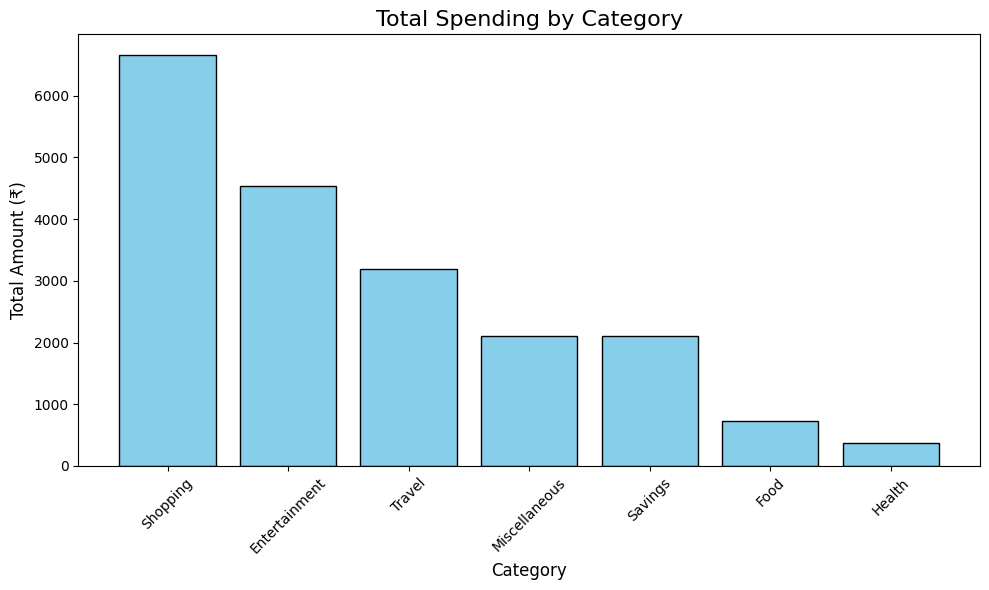

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(category_summary.index, category_summary.values, color="skyblue", edgecolor="black")
plt.title("Total Spending by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Amount (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


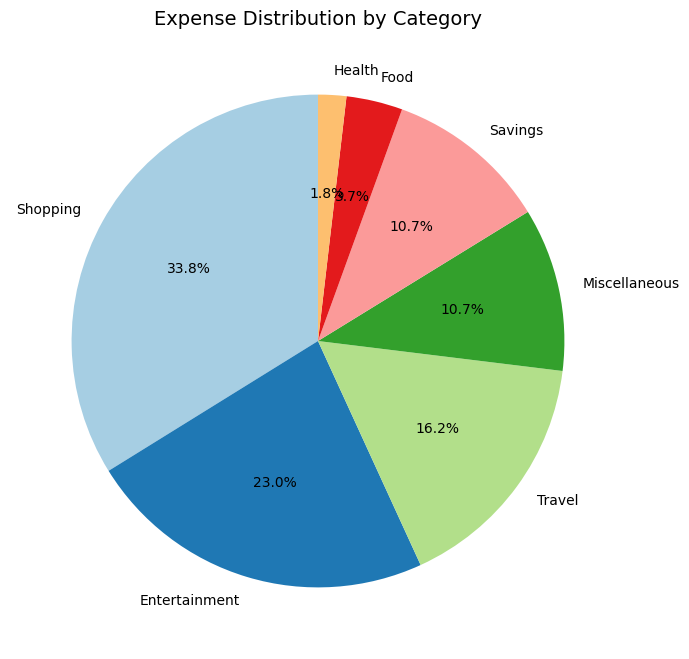

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(category_summary.values,
        labels=category_summary.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.Paired.colors)
plt.title("Expense Distribution by Category", fontsize=14)
plt.show()


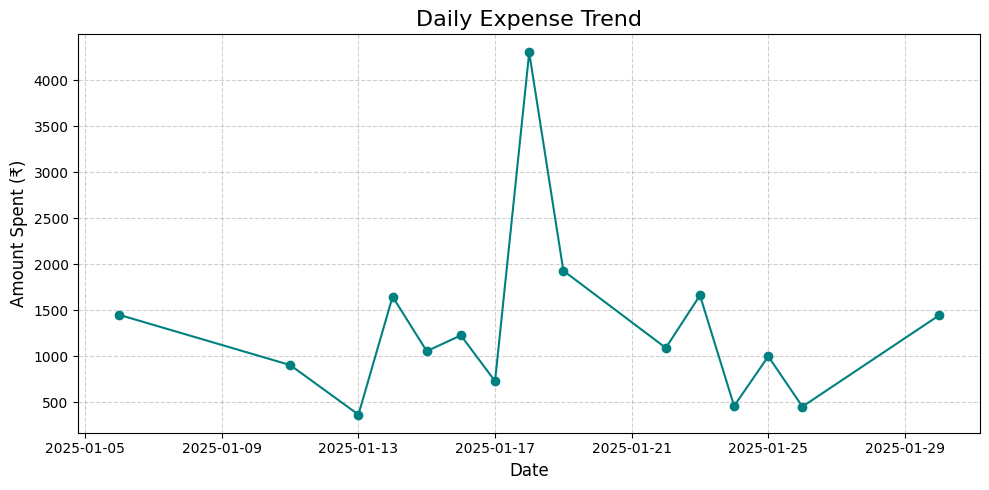

In [8]:
daily_expense = df.groupby("Date")["Amount"].sum()

plt.figure(figsize=(10, 5))
plt.plot(daily_expense.index, daily_expense.values, marker="o", color="teal")
plt.title("Daily Expense Trend", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Amount Spent (₹)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## 📈 Insights Summary

- **Total Spent:** ₹X,XXX  
- **Top Category:** e.g., Shopping  
- **Average Transaction:** ₹XXX  
- You can clearly see from the pie chart that most spending goes into [your top category].
- Spending pattern over time shows peaks around certain days — indicating weekends or shopping events.
